## Importing Packages

In [1]:
import numpy as np
import pandas as pd

## Importing the dataset

## Section 1 

In [2]:
df = pd.read_csv(r"C:\Users\OneDrive\Dokument\Machine Learning for Predictive Analytics in Business\EXAM\QS_World_University_Rankings.csv")

### 1. Show the first 15 rows

Firstly, I imported the data using the pandas read_csv. To view the first rows, I used the 'head' function and set the number of rows displayed to 15.

In [3]:
df.head(15)

,Year,Rank Score,Country,City,Region,Type,Research Output,Student Faculty Ratio,International Students,Size,Faculty Count
0,2017,100.0,United States,Cambridge,North America,Private,Very High,4.0,"3,730",M,"3,065"
1,2017,98.7,United States,Stanford,North America,Private,Very High,3.0,"3,879",L,"4,725"
2,2017,98.3,United States,Cambridge,North America,Private,Very High,5.0,"5,877",L,"4,646"
3,2017,97.2,United Kingdom,Cambridge,Europe,Public,Very high,4.0,"7,925",L,"5,800"
4,2017,96.9,United States,Pasadena,North America,Private,Very High,2.0,692,S,968
5,2017,96.8,United Kingdom,Oxford,Europe,Public,Very High,3.0,"8,442",L,"6,708"
6,2017,95.6,United Kingdom,London,Europe,Public,Very High,5.0,"21,824",XL,"7,195"
7,2017,94.2,Switzerland,Zürich,Europe,Public,Very High,7.0,"7,733",L,"2,719"
8,2017,94.1,United Kingdom,London,Europe,Public,Very High,5.0,"11,143",L,"8,000"
9,2017,93.0,United States,Chicago,North America,Private,Very High,6.0,"4,696",L,"2,703"


### 2. Dimensions & Data Types

To show the dimensions and the various types of variables in the data, I used the 'shape' and 'dtypes' functions. As seen below, the data contains 6482 rows and 11 variables.

In [4]:
df.shape

(6482, 11)

In [5]:
df.dtypes

Year                        int64
Rank Score                float64
Country                    object
City                       object
Region                     object
Type                       object
Research Output            object
Student Faculty Ratio     float64
International Students     object
Size                       object
Faculty Count              object
dtype: object

### 3. Missing values per Variable

The approach I used here to check the missing values included the following steps: For each row in a specific column (variable) in the data, a boolean value is returned if it is missing by the isnull function. 
This is then divided by the number of rows in the data and multiplied by 100 to convert it to percentage format. As can be seen below, a huge number observations are missing a 'Rank Score' value.

In [6]:
for column in df.columns:
    print(f"{column}: {df[column].isnull().sum() / len(df) * 100:.2f} %")

Year: 0.00 %
Rank Score: 56.49 %
Country: 0.00 %
City: 2.75 %
Region: 0.00 %
Type: 0.19 %
Research Output: 0.03 %
Student Faculty Ratio: 1.16 %
International Students: 2.53 %
Size: 0.03 %
Faculty Count: 1.20 %


### 4. Removing the missing values

As the task is to drop the missing values, I used the dropna function with the default setting 'any', which drops a row if it has one NA value or more. After removing the missing values, the data now contains 2,716 rows and 11 variables.

In [7]:
df = df.dropna(how = 'any')
df.shape

(2716, 11)

### 5. Convert “International Students” and “Faculty Count” into integer type

An inspection of the variables "International Students" and "Faculty Count" is needed. As observed below, some values contain both commas (",") and periods ("."), which appears to be a pattern affecting both variables. I will interpret these as representing the same thing. Therefore, I assume that both commas and periods can be replaced with an empty character to convert the values to an integer format. 

In [8]:
print(df['International Students'], df['Faculty Count'])

0        3,730
1        3,879
2        5,877
3        7,925
4          692
         ...  
5678      2.27
5679     2.441
5680     1.429
5681     3.505
5682    12.285
Name: International Students, Length: 2716, dtype: object 0       3,065
1       4,725
2       4,646
3       5,800
4         968
        ...  
5678    2.668
5679    1.656
5680    1.017
5681    1.446
5682    1.508
Name: Faculty Count, Length: 2716, dtype: object


To provide an example, see the first and last observations below. We can see that each is using either a comma (",") or a period (".") to separate the numerical values, which I assume represent thousands. 'International Students' and 'Faculty Count' should both be numbers representing the size of the populations as integers.

In [9]:
df.head(1)

,Year,Rank Score,Country,City,Region,Type,Research Output,Student Faculty Ratio,International Students,Size,Faculty Count
0,2017,100.0,United States,Cambridge,North America,Private,Very High,4.0,"3,730",M,"3,065"


In [10]:
df.tail(1) 

,Year,Rank Score,Country,City,Region,Type,Research Output,Student Faculty Ratio,International Students,Size,Faculty Count
5682,2022,24.1,Canada,Toronto,North America,Public,Very High,29.0,12.285,XL,1.508


In the current format, both variables are of object type and are interpreted as strings. For example, the value '3,065' or '3.065' should be converted to the integer '3065'. To perform this conversion to integer type, I used the 'str' and 'replace' functions to replace commas (",") and periods (".") with an empty character ("").

In [11]:
df['International Students'] = df['International Students'].str.replace(',', '').str.replace('.', '').astype(int)
df['Faculty Count'] = df['Faculty Count'].str.replace(',', '').str.replace('.', '').astype(int)

### 6. Convert object variables into categorical type

In [12]:
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = df[i].astype('category')

df.dtypes

Year                         int64
Rank Score                 float64
Country                   category
City                      category
Region                    category
Type                      category
Research Output           category
Student Faculty Ratio      float64
International Students       int64
Size                      category
Faculty Count                int64
dtype: object

### 7. Move the variable “Rank Score” to the last column

In [13]:
df = df.iloc[:, [0] + list(range(2, 11)) + [1]]
df.head()

,Year,Country,City,Region,Type,Research Output,Student Faculty Ratio,International Students,Size,Faculty Count,Rank Score
0,2017,United States,Cambridge,North America,Private,Very High,4.0,3730,M,3065,100.0
1,2017,United States,Stanford,North America,Private,Very High,3.0,3879,L,4725,98.7
2,2017,United States,Cambridge,North America,Private,Very High,5.0,5877,L,4646,98.3
3,2017,United Kingdom,Cambridge,Europe,Public,Very high,4.0,7925,L,5800,97.2
4,2017,United States,Pasadena,North America,Private,Very High,2.0,692,S,968,96.9


### 8. Create a grouped box

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

As per the instructions, I created a figure grid with the specified guidelines for the plot. As shown in the plot below, there is a variation in the 'Rank Score' underlying the dataset, which seems to exhibit a downward trend over the years. The legend is placed outside the plot area, indicating which region corresponds to each color.

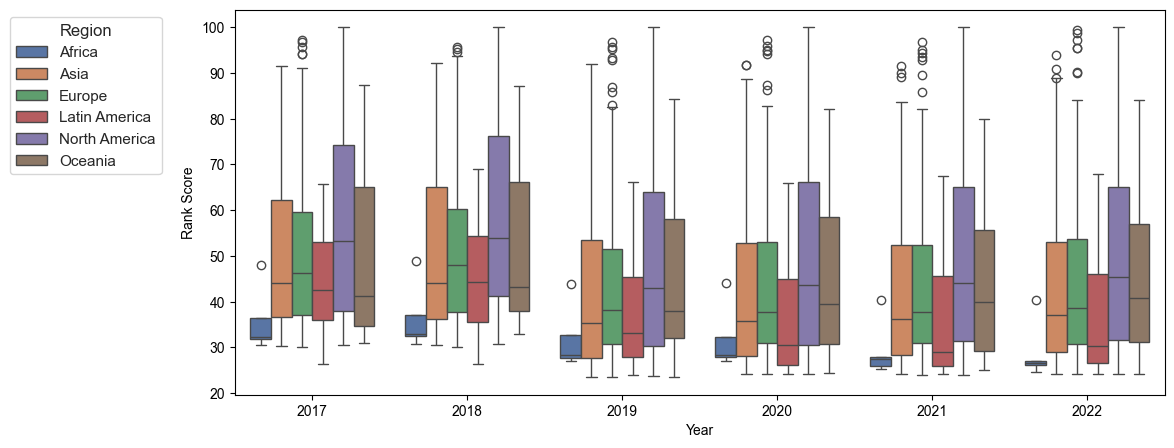

In [15]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.set(style="white")  
box_plot = sns.boxplot(x='Year', y='Rank Score', hue='Region', data=df, ax=ax)
ax.legend(title='Region', loc='upper left', bbox_to_anchor=(-0.25, 1))
plt.show()

### 9. Create a horizontal grouped bar chart

As per the instructions, I created a figure grid with the specified guidelines for the plot. In this case, the legend is placed inside the plot area. As seen in the code, it is a mixture of Seaborn and Matplotlib functions.

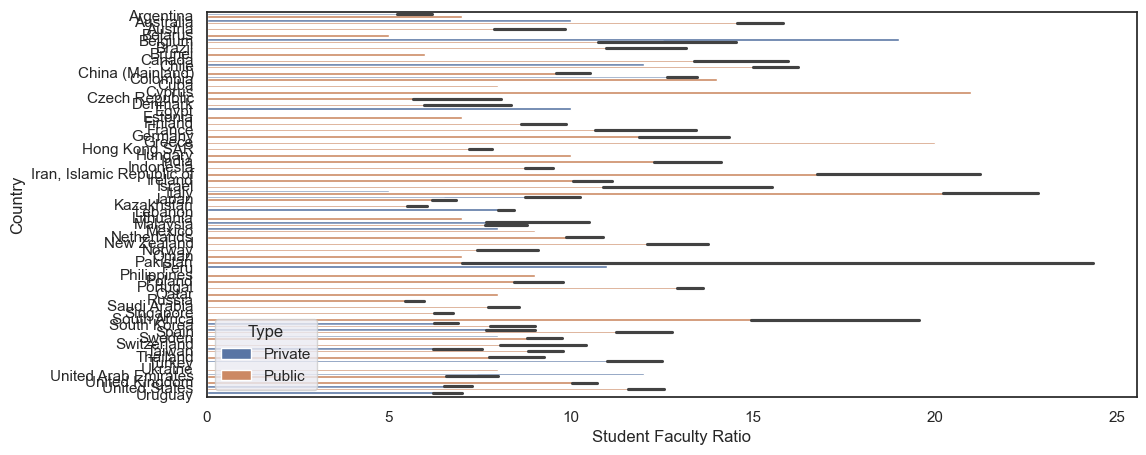

In [16]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.set(style="darkgrid") 
bar_plot = sns.barplot(x='Student Faculty Ratio', y='Country', hue='Type', data=df, orient='h')
plt.legend(title='Type', loc='lower left', bbox_to_anchor=(0, 0))
plt.show()

## Section 2

As per by inspection from the data types of the variables, we are dealing with categorical features where some has different measurements. Firstly let's comment on the variables. 

As we are dealing with different types of variables and the number of dummies is quite a lot, we will need a machine learning algorithm that is fit to both handle high dimensions and the target variable 'Rank Score' which is a continous variable. A machine learning algorithm that is able to handle and perform regression is of interest. First we do somewhat assume that the number of different combination and that some variables is somewhat redundant but should not be completely disregarded. Ofcourse the number of variables are highly correlated as for example region - country - city is connected to each other. For example if the region is limited to 'North America' we are automatically restricted to only those countries and cities. Thus, the aim to be able to predict new data points for the continous variable 'Rank Score'. 

In [17]:
df.iloc[1,:]

Year                               2017
Country                   United States
City                           Stanford
Region                    North America
Type                            Private
Research Output               Very High
Student Faculty Ratio               3.0
International Students             3879
Size                                  L
Faculty Count                      4725
Rank Score                         98.7
Name: 1, dtype: object

In [18]:
for columns in df.columns:
    if df[columns].dtype == 'category':
        print(df[columns].unique())

['United States', 'United Kingdom', 'Switzerland', 'Singapore', 'Australia', ..., 'Hungary', 'Lithuania', 'Uruguay', 'Cyprus', 'Cuba']
Length: 61
Categories (61, object): ['Argentina', 'Australia', 'Austria', 'Belarus', ..., 'United Arab Emirates', 'United Kingdom', 'United States', 'Uruguay']
['Cambridge', 'Stanford', 'Pasadena', 'Oxford', 'London', ..., 'Chengdu', 'Golden', 'Surabaya', 'Ramat Gan', 'Giessen']
Length: 404
Categories (404, object): ['Aachen', 'Aalborg', 'Aarhus', 'Aberdeen', ..., 'Yogyakarta', 'Yokohama City', 'York', 'Zürich']
['North America', 'Europe', 'Asia', 'Oceania', 'Latin America', 'Africa']
Categories (6, object): ['Africa', 'Asia', 'Europe', 'Latin America', 'North America', 'Oceania']
['Private', 'Public']
Categories (2, object): ['Private', 'Public']
['Very High', 'Very high', 'High', 'Medium', 'Low']
Categories (5, object): ['High', 'Low', 'Medium', 'Very High', 'Very high']
['M', 'L', 'S', 'XL']
Categories (4, object): ['L', 'M', 'S', 'XL']


The code below creates a histogram for each numerical feature. As can be seen, many data points in the dataset have a 'Rank Score' under 60. The histogram for 'Student Faculty Ratio' appears to follow a normal distribution with some outliers that have rather high values. The number of 'International Students' under 5000 constitutes the majority in the dataset, with a left-skewed distribution visually. The same can be said for 'Faculty Count'

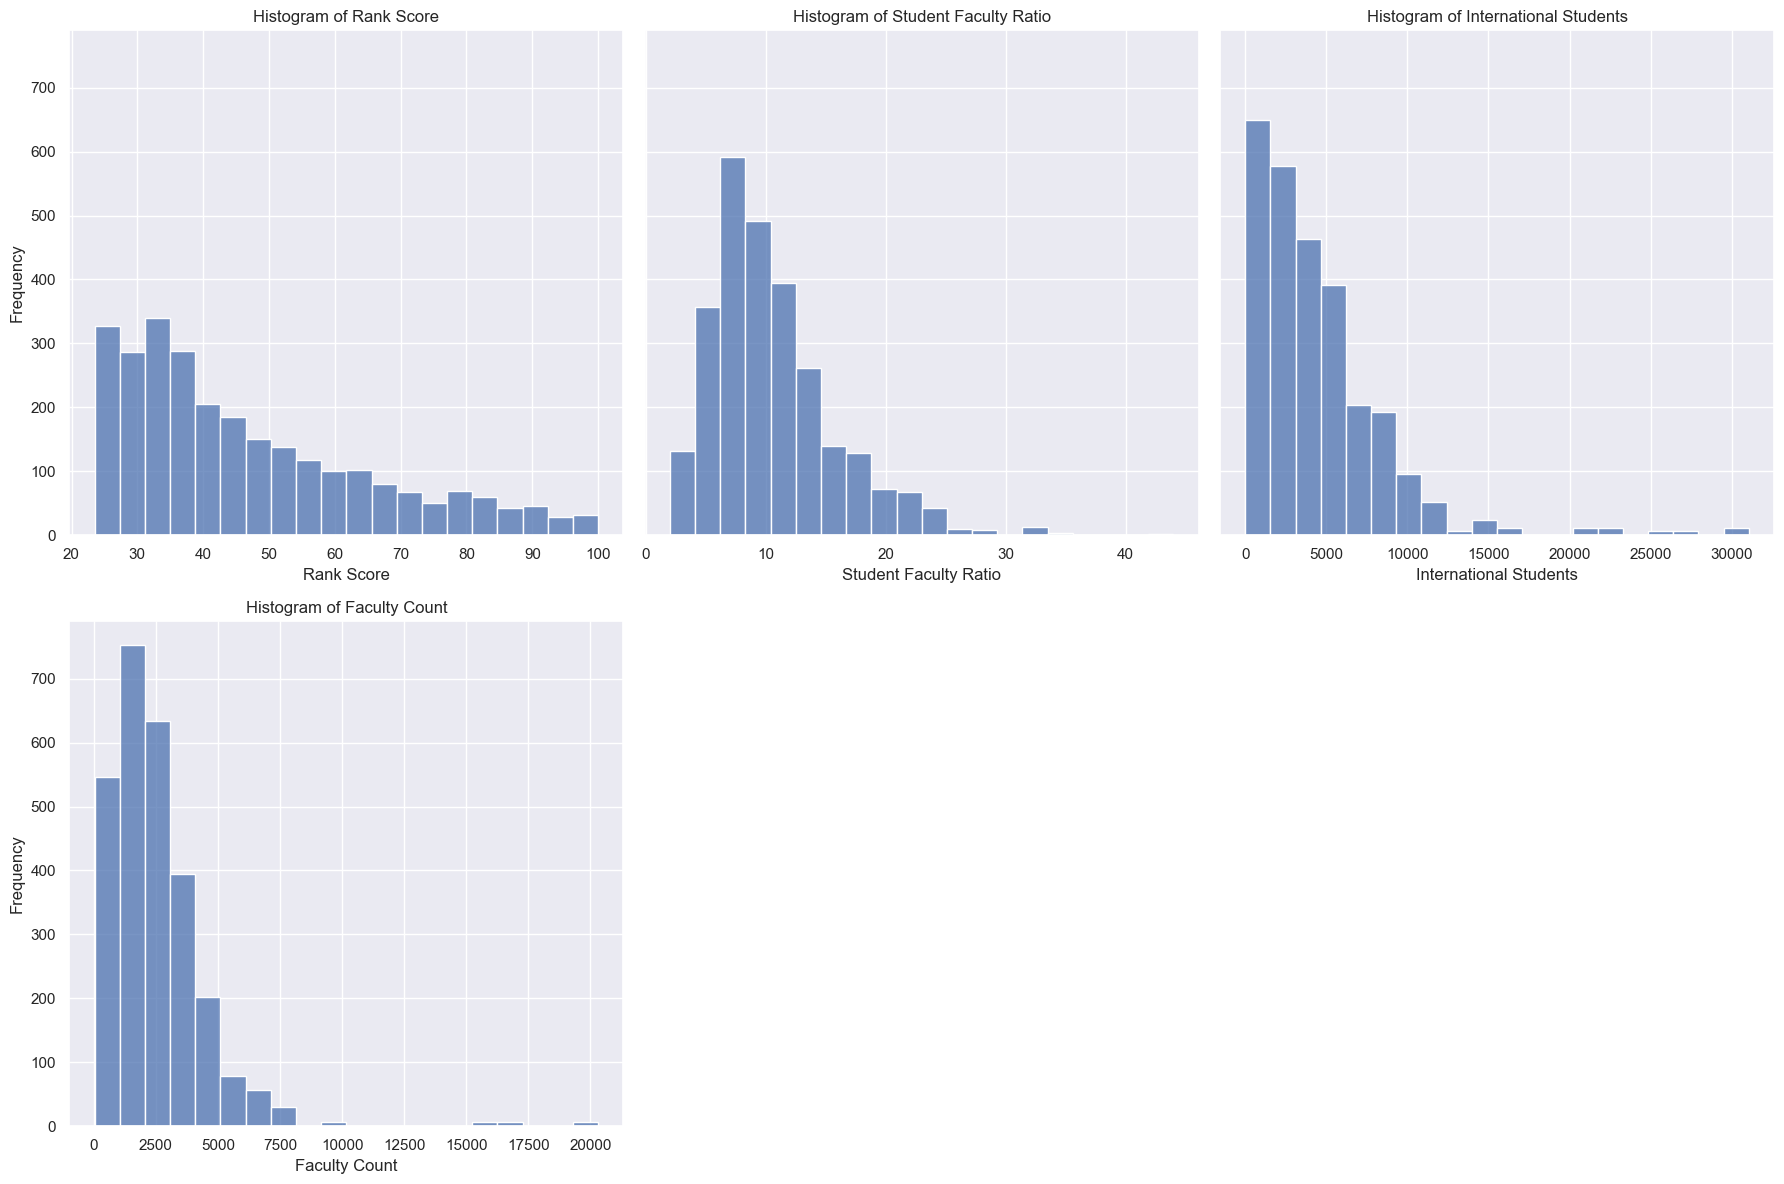

In [19]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12), sharey=True)

sns.histplot(data=df, x='Rank Score', bins=20, kde=False, ax=axes[0, 0])
axes[0, 0].set_title('Histogram of Rank Score')
axes[0, 0].set_xlabel('Rank Score')
axes[0, 0].set_ylabel('Frequency')

sns.histplot(data=df, x='Student Faculty Ratio', bins=20, kde=False, ax=axes[0, 1])
axes[0, 1].set_title('Histogram of Student Faculty Ratio')
axes[0, 1].set_xlabel('Student Faculty Ratio')

sns.histplot(data=df, x='International Students', bins=20, kde=False, ax=axes[0, 2])
axes[0, 2].set_title('Histogram of International Students')
axes[0, 2].set_xlabel('International Students')

sns.histplot(data=df, x='Faculty Count', bins=20, kde=False, ax=axes[1, 0])
axes[1, 0].set_title('Histogram of Faculty Count')
axes[1, 0].set_xlabel('Faculty Count')
axes[1, 0].set_ylabel('Frequency')

axes[1, 1].axis('off')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

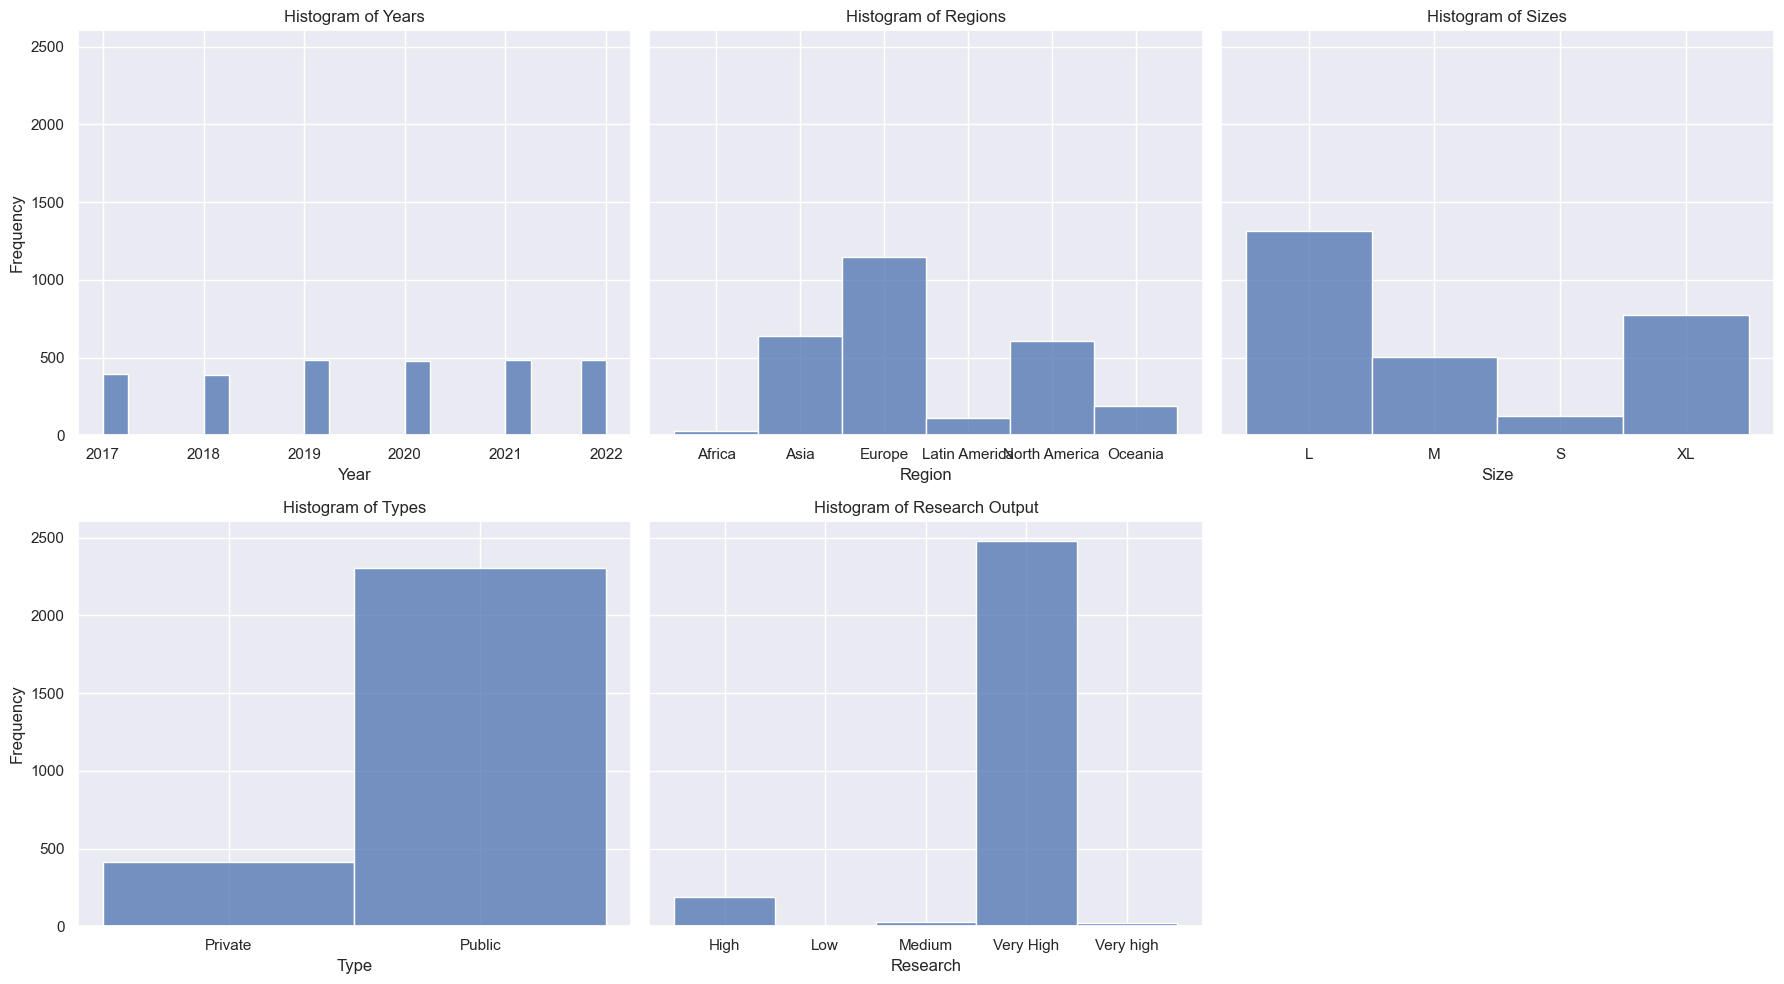

In [20]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharey=True)

sns.histplot(data=df, x='Year', bins=20, kde=False, ax=axes[0, 0])
axes[0, 0].set_title('Histogram of Years')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Frequency')

sns.histplot(data=df, x='Region', bins=20, kde=False, ax=axes[0, 1])
axes[0, 1].set_title('Histogram of Regions')
axes[0, 1].set_xlabel('Region')

sns.histplot(data=df, x='Size', bins=20, kde=False, ax=axes[0, 2])
axes[0, 2].set_title('Histogram of Sizes')
axes[0, 2].set_xlabel('Size')

sns.histplot(data=df, x='Type', bins=20, kde=False, ax=axes[1, 0])
axes[1, 0].set_title('Histogram of Types')
axes[1, 0].set_xlabel('Type')
axes[1, 0].set_ylabel('Frequency')

sns.histplot(data=df, x='Research Output', bins=20, kde=False, ax=axes[1, 1])
axes[1, 1].set_title('Histogram of Research Output')
axes[1, 1].set_xlabel('Research')

axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

As can be seen in the histogram for 'Research Output,' some observations appear to have 'Very High' written with a lowercase character. A conversion was done using the str and replace functions to standardize the spelling. Public institutions dominate, and most observations have a 'Very High' research output. Asia, Europe, and North America are the largest regions represented. There is a fairly even distribution across the years, which is not surprising, as it probably concerns the same universities. Large and XL-sized institutions have the highest frequencies.

In [21]:
df['Research Output'] = df['Research Output'].str.replace('Very high', 'Very High')

In [22]:
df2 = pd.get_dummies(df, drop_first=True)
df2.head(5)

,Year,Student Faculty Ratio,International Students,Faculty Count,Rank Score,Country_Australia,Country_Austria,Country_Belarus,Country_Belgium,Country_Brazil,...,Region_Latin America,Region_North America,Region_Oceania,Type_Public,Research Output_Low,Research Output_Medium,Research Output_Very High,Size_M,Size_S,Size_XL
0,2017,4.0,3730,3065,100.0,False,False,False,False,False,...,False,True,False,False,False,False,True,True,False,False
1,2017,3.0,3879,4725,98.7,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False
2,2017,5.0,5877,4646,98.3,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False
3,2017,4.0,7925,5800,97.2,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
4,2017,2.0,692,968,96.9,False,False,False,False,False,...,False,True,False,False,False,False,True,False,True,False


A preprocessing step is not always necessary for all machine learning algorithms, but it can be beneficial for those that rely on optimization and for some where larger scales have an influential effect. The transformation for numerical feature can be summarized as the following:  

$$ \widetilde{x}_{n} = \frac{x_n - \bar{x}}{\text{std}(x)} = \frac{x_n - \bar{x}}{\sqrt{\text{var}(x)}} $$ as described in *Session_06 Artificial Neural Networks* (Chen, 2024). A preprocessing step was performed on the numerical features because 'Student Faculty Ratio' and 'Year' differ in measurement scale compared to 'International Students' and 'Faculty Count'. Implemented by the 'StandardScalar' function to the numerical features as seen below.  

In [23]:
from sklearn.preprocessing import StandardScaler

numerical_cols = ['Year', 'Student Faculty Ratio', 'International Students', 'Faculty Count']

scaler = StandardScaler()
df2[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In the step below a conversion of the DataFrame to a Numpy Array of the input varibles and the target variable was done. 

In [24]:
df2[numerical_cols]

,Year,Student Faculty Ratio,International Students,Faculty Count
0,-1.573906,-1.308741,-0.176973,0.264178
1,-1.573906,-1.504799,-0.141651,1.085583
2,-1.573906,-1.112682,0.331994,1.046492
3,-1.573906,-1.308741,0.817492,1.617517
4,-1.573906,-1.700857,-0.897160,-0.773465
...,...,...,...,...
5678,1.406245,-0.720565,-1.007393,0.067733
5679,1.406245,1.240019,-0.482543,-0.433027
5680,1.406245,-0.328448,-0.722447,-0.749219
5681,1.406245,1.240019,-0.230311,-0.536940


In [25]:
col_names = df2.columns

x = df2.drop(columns=['Rank Score']).to_numpy()
y = df2["Rank Score"].to_numpy()

print(x)
print(y)

[[-1.5739064474775109 -1.308740523726694 -0.17697278874319683 ... True
  False False]
 [-1.5739064474775109 -1.50479894967494 -0.14165090251720666 ... False
  False False]
 [-1.5739064474775109 -1.112682097778448 0.3319942564058026 ... False
  False False]
 ...
 [1.4062454706407286 -0.32844839398546366 -0.7224470183136895 ... True
  False False]
 [1.4062454706407286 1.240019013600505 -0.230311207540833 ... False False
  False]
 [1.4062454706407286 3.592720124979458 1.851072423762481 ... False False
  True]]
[100.   98.7  98.3 ...  24.1  24.1  24.1]


### Selected Algorithms

(1) Gradient Boosting is an adaptive basis function model. The adaptive basis function can be represented as:
    $f(\mathbf{x})=w_0+\sum_{m=1}^M w_m \phi_m(\mathbf{x})$, where $x$ denotes the input variables and $ \theta_(x) $ represents the m'th basis function. These models often outperform linear models.$\theta_m$ are generated by weak learners, which are updated iteratively. The model adds weight to those cases that were misclassified in previous iterations. The weak learner is commonly constructed using the CART (Classification and Regression Trees) approach, where decision trees can be used for regression by partitioning the input space (features) into smaller regions. Thus, the local model is formed by the leaves of the tree. The approach can be explained by, for example, the first node checking if the input variable is less than or greater than a given threshold, and so on.

   Classification and regression trees are popular for several reasons: they are interpretable, can handle a mixture of features (both discrete and continuous), and can scale to larger datasets. Boosting, as an adaptive basis function model, has the form:
   
   $f(\mathbf{x})=w_0+\sum_{m=1}^M w_m \phi_m(\mathbf{x}).$

A generic version of boosting for various loss functions is also known as gradient boosting, which is a step-wise gradient descent solution (Murphy, 2012, pp. 543-544, 550, 554, 560). The first choice for the dataset was the Gradient Boosting Decision Tree (GBDT) machine learning algorithm. Since we are dealing with many variables, including mixed types due to the dummy conversion of numerous countries and cities. 
   
(2) Support Vector Regression (SVR) utilizes kernel functions in its algorithmic approach, where $k(x,x') \geq 0$ measures similarity between different objects (x and x'). Kernels can be used for both classification and regression. SVR falls under the category of support vector machines, which aim to create a sparse kernel machine by including a modification of the likelihood term. Involving the so-called kernel trick, where the inner product $x^T x$ is replaced by calls to the kernel function, a support vector is a combination of this kernel trick and a modification of the loss function. Specifically, Support Vector Machines (SVM) for regression use a method that results in a sparse estimate. The kernelized solution is of the following form:

   $\hat{y}(\mathbf{x})=\hat{w}_0+\sum_i \alpha_i \kappa\left(\mathbf{x}_i, \mathbf{x}\right),$

   where  $\alpha$ denotes the support vector, and the solution can be used to make predictions (Murphy, 2012, pp.479, 487-488, 496-498). Since our dataset contains a mixture of variables and the task at hand is nonlinear, SVR is suitable because it has the ability to predict the continuous target variable, 'Rank Score.' 


(3) A feedforward neural network (Multi-layer Perceptron) can be simply described as several logistic regression models stacked on top of each other, with the final layer being either a linear regression model or a logistic regression model, depending on the task. The task could be either classification or regression (Murphy, 2012, pp. 563).

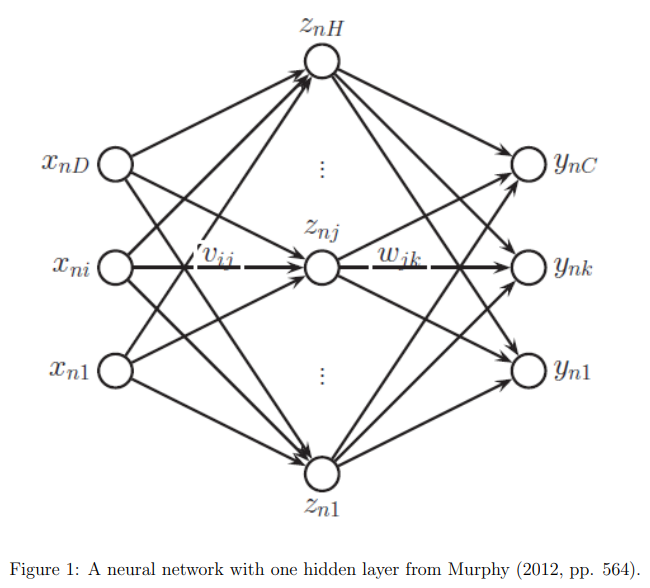

As can be seen in Figure 1 above, the Feed forward neural network model consists of input features $x$ and forms a weight matrix $V$ , which is connected to hidden nodes (layers). The hidden layers are represented by $z(x) = \theta(x, V) $ , which in turn has a weight matrix $w$ connected to the output. The model includes a nonlinear activation function, commonly the logistic function; without this activation function, the model reduces to a linear regression model. It is important to note that the feedforward neural network, given enough hidden units, can model any smooth function with no restriction in terms of accuracy (Murphy, 2012, pp. 563-564). A feedforward neural network (MLP) is well-suited for the complexity of the task, which involves a dataset with 480 variables and is of a regression type. The ability to tune the model is also desirable, allowing adjustments to layers, activation functions, and other parameters.

#### Implementing Selected Algorithms

First, we import the GradientBoostingRegressor, MLPRegressor, and SVR classes from the *sklearn* package, which allow us to fit the models to our data.

In [26]:
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.neural_network import MLPRegressor

from sklearn.svm import SVR

We noted that we had to drop a lot of the observations in the previous section due to missing 'Rank Score' etc. and only kept 2716/6487 of the original dataset. It is a quite decent amount of observations and could be seperated into training and validation set of 80 percent and 20 percent respectively as described by the Murphy (pp.23, 2012). Started with the default hyperparameter values for each algorithm to establish a baseline for prediction performance using the random_seed that was assigned where it is possible. Implementation is quite straight forward below. I use the classes imported to create instances which is used later for each algorithm as seen below. 

In [27]:
from sklearn.model_selection import train_test_split

random_seed = 27

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=random_seed)

gbr_regressor = GradientBoostingRegressor(random_state=random_seed)
mlp_regressor = MLPRegressor(random_state=random_seed)
svr_regressor = SVR()  

I evaluate and test the default hyperparameters for each selected algorithm based on the mean squared error, as seen below for both the training and test datasets. Without going into detail at this stage regarding the specific values derived. Below, we use the default models from the classes to predict the training dataset using the input variables, in order to calculate the mean squared error. This process is also applied to the test dataset, which serves as our validation set

In [ ]:
from sklearn.metrics import mean_squared_error

gbr_regressor.fit(x_train, y_train)
mlp_regressor.fit(x_train, y_train)
svr_regressor.fit(x_train, y_train)

print("=== Gradient Boosting Regressor Train ===")
y_pred_train_gbr = gbr_regressor.predict(x_train)
print("Train MSE:", mean_squared_error(y_train, y_pred_train_gbr))

print("=== Gradient Boosting Regressor Test ===")
y_pred_test_gbr = gbr_regressor.predict(x_test)
print("Test MSE:", mean_squared_error(y_test, y_pred_test_gbr))

print("=== MLP Regressor Train ===")
y_pred_train_mlp = mlp_regressor.predict(x_train)
print("Train MSE:", mean_squared_error(y_train, y_pred_train_mlp))

print("=== MLP Regressor Test ===")
y_pred_test_mlp = mlp_regressor.predict(x_test)
print("Test MSE:", mean_squared_error(y_test, y_pred_test_mlp))

print("=== SVR Train ===")
y_pred_train_svr = svr_regressor.predict(x_train)
print("Train MSE:", mean_squared_error(y_train, y_pred_train_svr))

print("=== SVR Test ===")
y_pred_test_svr = svr_regressor.predict(x_test)
print("Test MSE:", mean_squared_error(y_test, y_pred_test_svr))

To implement the selected algorithms and select the best models for each, I followed the Cross-Industry Standard Process for Data Mining (CRISP-DM) structure as described in Session_10 ML_Course Review (Chen, 2024).

I used the RandomizedSearchCV class from the *sklearn* package for hyperparameter tuning and finding the most suitable models. The goal is to apply three different machine learning algorithms and compare their performance. Cross-validation is a popular method for model selection, where the training data is divided into different K-folds (commonly K = 5) to compute an average error (Murphy 2012, p. 24). 

A parameter dictionary with various values for the hyperparameters of interest is used to explore different randomized configurations. For each algorithm, the best parameters are then identified and used to create the 'tuned' model, which is compared with the default settings of each algorithm.

In [29]:
from sklearn.model_selection import RandomizedSearchCV

The default settings for 'GradientBoostingRegressor' are 100 for the number of estimators and 0.1 for the learning rate (seen in the documentation). Therefore, I set intervals that are both below and above these values. Of course, there are many more hyperparameters that can be tuned, but this is a time limitation of the exam assignment, unfortunately.

In [30]:
param_gbr = {
    'n_estimators': [50, 100, 200, 400, 800, 1000],
    'learning_rate': [0.01, 0.05, 0.1,0.15, 0.20]
}

random_search_gbr = RandomizedSearchCV(
    estimator=gbr_regressor,
    param_distributions=param_gbr,
    scoring='neg_mean_squared_error' 
)

random_search_gbr.fit(x_train, y_train)
best_params_gbr = random_search_gbr.best_params_

best_params_gbr

{'n_estimators': 800, 'learning_rate': 0.2}

In [31]:
print("Train MSE GBR:", mean_squared_error(y_train,  random_search_gbr.predict(x_train)))
print("Test MSE GBR:", mean_squared_error(y_test,  random_search_gbr.predict(x_test)))

Train MSE GBR: 5.3893401260333
Test MSE GBR: 13.334758756512983


The default settings for 'MLPRegressor' are a hidden layer size of (100,) and a learning rate constant of 0.001 (as noted in the documentation). Additionally, I plan to experiment with different activation functions, such as 'tanh', while the default function is 'relu'. As mentioned earlier, I have set intervals both below and above these default values. Although there are many other hyperparameters that can be tuned, this is a limitation due to the time-intensive nature of RandomizedSearchCV.

In [ ]:
param_mlp = {
    'hidden_layer_sizes': [(50,), (100,) (100, 50), (100, 100, 50)],
    'activation': ['tanh', 'relu'],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [200, 300, 400],
}

random_search_mlp = RandomizedSearchCV(
    estimator=mlp_regressor,
    param_distributions=param_mlp,
    scoring='neg_mean_squared_error' 
)

random_search_mlp.fit(x_train, y_train)
best_params_mlp = random_search_mlp.best_params_

best_params_mlp

In [33]:
print("Train MSE MLP:", mean_squared_error(y_train,  random_search_mlp.predict(x_train)))
print("Test MSE MLP:", mean_squared_error(y_test,  random_search_mlp.predict(x_test)))

Train MSE MLP: 1.1269850743466208
Test MSE MLP: 12.352933719657706


The default settings for 'SVR' are C (regularization) = 1.0 and epsilon = 0.1 (as noted in the documentation). As mentioned earlier, I have set intervals both below and above these default values. Although there are many other hyperparameters that can be tuned, this is a limitation due to the time-intensive nature of RandomizedSearchCV.

In [34]:
param_svr = {
    'C': [0.1, 1, 10, 50, 100],  
    'epsilon': [0.01, 0.1, 0.2, 0.5, 1.0], 
}


random_search_svr = RandomizedSearchCV(
    estimator=svr_regressor,
    param_distributions=param_svr,
    scoring='neg_mean_squared_error' 
)

random_search_svr.fit(x_train, y_train)
best_params_svr = random_search_svr.best_params_

best_params_svr

{'epsilon': 0.1, 'C': 100}

In [35]:
print("Train MSE SVR:", mean_squared_error(y_train,  random_search_svr.predict(x_train)))
print("Test MSE SVR:", mean_squared_error(y_test,  random_search_svr.predict(x_test)))

Train MSE SVR: 5.541408551410967
Test MSE SVR: 14.803258196369557


#### Best Model

Noting that there was a significant difference in Mean Squared Error (MSE) values between the default and tuned models, as shown below, let's summarize the performance of the selected algorithms with both default and hyper-tuned parameters. To illustrate this, we used the predicted mean squared error values from both the default and tuned models to create a Pandas DataFrame.

In [42]:
mse_data = {
    'Model': ['Gradient Boosting Regressor', 'Multi-layer Perceptron', 'Support Vector Regressor'],
    'Train MSE Default': [
        mean_squared_error(y_train, gbr_regressor.predict(x_train)),
        mean_squared_error(y_train, mlp_regressor.predict(x_train)),
        mean_squared_error(y_train, svr_regressor.predict(x_train))
    ],
    'Test MSE Default': [
        mean_squared_error(y_test, gbr_regressor.predict(x_test)),
        mean_squared_error(y_test, mlp_regressor.predict(x_test)),
        mean_squared_error(y_test, svr_regressor.predict(x_test))
    ],
        'Train MSE Tuned': [
        mean_squared_error(y_train, random_search_gbr.predict(x_train)),
        mean_squared_error(y_train, random_search_mlp.predict(x_train)),
        mean_squared_error(y_train, random_search_svr.predict(x_train))
    ],
        'Test MSE Tuned': [
        mean_squared_error(y_test, random_search_gbr.predict(x_test)),
        mean_squared_error(y_test, random_search_mlp.predict(x_test)),
        mean_squared_error(y_test, random_search_svr.predict(x_test))
    ]
}

mse_df = pd.DataFrame(mse_data)

print(mse_df)

                         Model  Train MSE Default  Test MSE Default  \
0  Gradient Boosting Regressor          80.043867         89.249826   
1       Multi-layer Perceptron          27.090993         35.543579   
2     Support Vector Regressor         159.904163        162.985736   

   Train MSE Tuned  Test MSE Tuned  
0         5.389340       13.334759  
1         1.126985       12.352934  
2         5.541409       14.803258  


The MLP performed the best in terms of test data mean squared error. Black-box models are generally known for their good predictive accuracy; however, their interpretability is challenging. This is often why linear models are popular, as they offer easier interpretation (Murphy, 2012, p. 585). The results for the MLP regression were as seen earlier: 

Train MSE GBR: 1.126985
Test MSE GBR: 12.352934

In terms of 'Rank Score,' this can be interpreted as a good prediction. The 'Rank Score' is a score within the interval from 0 to 100.

However, as I am not delving deeply into the black-box model of our system, I instead focus on the descriptive statistics of the features in relation to the target variable, Rank Score. As observed in the previous section where the histogram of the regions was illustrated, the median and boxplots varied significantly between the regions. Additionally, countries exhibited a wide range of student-to-faculty ratios.

Looking at the histogram below for Size, it is evident that observations classified as 'XL' have a higher median Rank Score. However, 'L' sized institutions exhibit a lot of outliers, especially in more recent years.

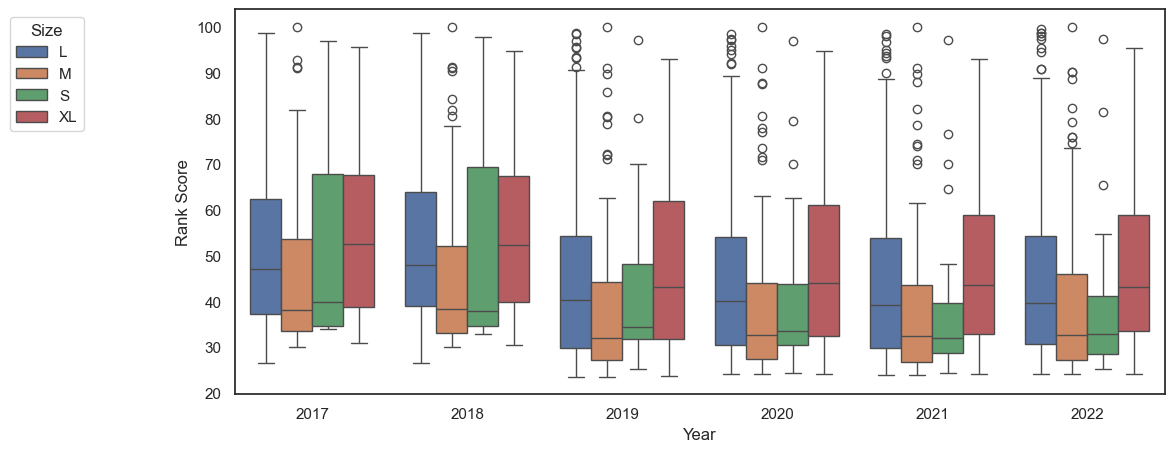

In [51]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.set(style="white")  
box_plot = sns.boxplot(x='Year', y='Rank Score', hue='Size', data=df, ax=ax)
ax.legend(title='Size', loc='upper left', bbox_to_anchor=(-0.25, 1))
plt.show()

Looking at the histogram for different types of universities, whether private or public, there does not seem to be a large difference in Rank Score.

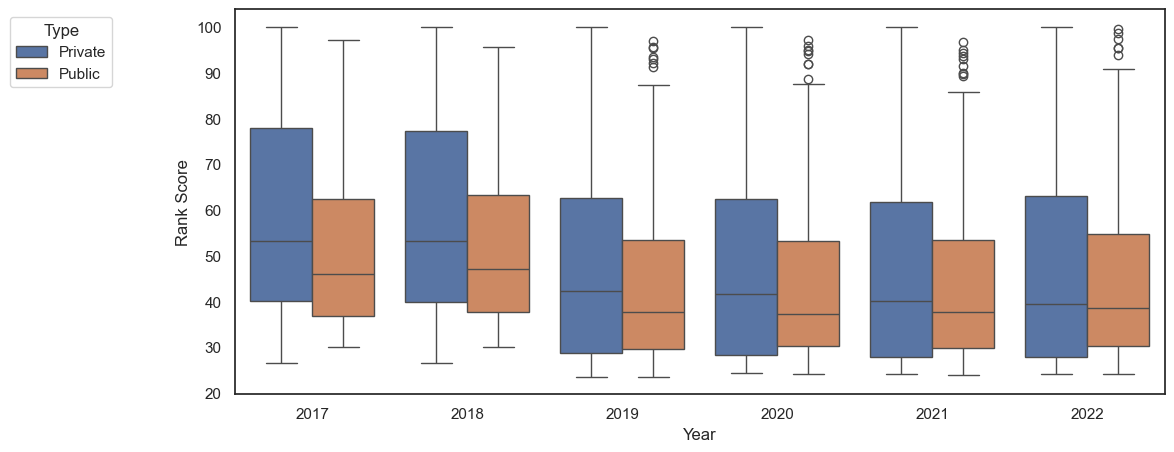

In [54]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.set(style="white")  
box_plot = sns.boxplot(x='Year', y='Rank Score', hue='Type', data=df, ax=ax)
ax.legend(title='Type', loc='upper left', bbox_to_anchor=(-0.25, 1))
plt.show()

The histogram for Research Output shows that universities with a "Very High" output generally have a higher Rank Score. However, I must be cautious, as most of the observations belong to this category, and only a minority fall into the other Research Output levels.

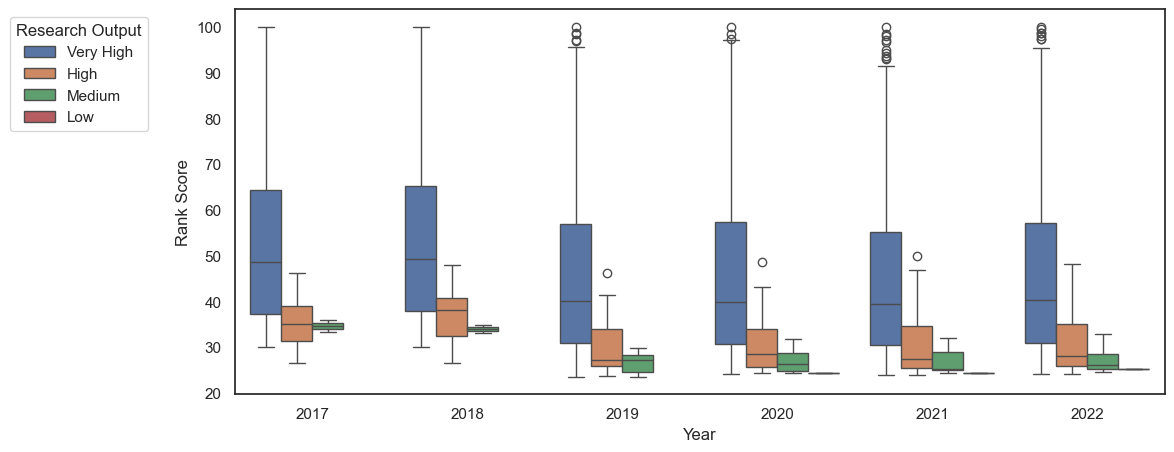

In [55]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.set(style="white")  
box_plot = sns.boxplot(x='Year', y='Rank Score', hue='Research Output', data=df, ax=ax)
ax.legend(title='Research Output', loc='upper left', bbox_to_anchor=(-0.25, 1))
plt.show()

Focusing now on the numerical features and viewing the pairs plot for these with 'Rank Score' one could note something very interesting but not suprising that with higher 'Student Faculty Ratio' the 'Rank Score' drops quite remarkebely. One conclusion could be that larger classes in comparision to faculty (teacher etc.) has a lower 'Rank Score' as less time is devoted for each student and so 'Rank Score' is lower. By viewing the pairs plot the relation seems quite linear. For 'Faculty Count' and 'International Students' this trend do not exist and they seem to not have a big effect as 'Student Faculty Ratio'. 

Lastly, based on the empirical findings, I would determine that the 'Student Faculty Ratio', 'Country', and 'Size' are the most influential features for prediction.

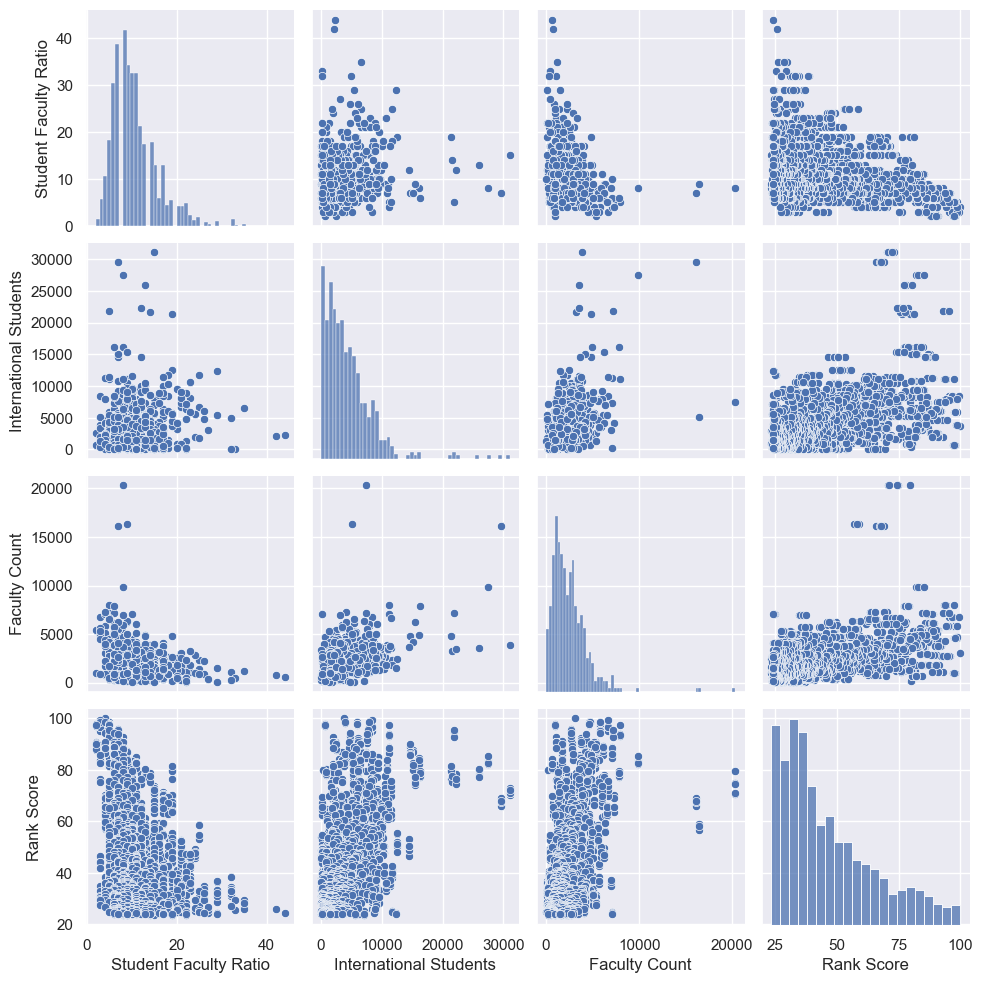

In [44]:
numerical_features = ['Student Faculty Ratio', 'International Students', 'Faculty Count', 'Rank Score']

sns.pairplot(df[numerical_features])

plt.show()

# References

B. Chen. Session_06 Artificial Neural Networks, CBS (CCMVI2085U), 2024.

B. Chen. Session_10 ML Review, CBS(CCMVI2085U) , 2024.

K.Murphy. Machine Learning: A Probabilistic Perspective, MIT Press 2012.
M.Deisenroth, A.Faisal, and C.Ong. Mathematics for Machine Learning, Cambridge University Press, 2020.